# <font color='teal'>BANK MARKETING DATA</font>

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

    1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
    2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
    3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
    4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
    
The smallest datasets
are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
# bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/abhil/Projects/bank_project/bank-additional/bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Change dependent variable name 'deposit' to 'y'
data['deposit'] = (data['y'] == 'yes').astype('int')
data.drop('y', axis=1, inplace=True)

In [4]:
data.shape

(41188, 21)

We have 41188 rows of data and 20 independent variables

In [5]:
columns = data.columns.to_list()
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'deposit']

In [6]:
data.info() # Missing data is marked as Unknown for most of the variables and cacnnot get the count like this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
for col in data.columns:
    print("Number of missing values in", str(col), ':', data[data[col] == 'unknown'][col].count())

Number of missing values in job : 330
Number of missing values in marital : 80
Number of missing values in education : 1731
Number of missing values in default : 8597
Number of missing values in housing : 990
Number of missing values in loan : 990
Number of missing values in contact : 0
Number of missing values in month : 0
Number of missing values in duration : 0
Number of missing values in campaign : 0
Number of missing values in previous : 0
Number of missing values in poutcome : 0
Number of missing values in cons.price.idx : 0
Number of missing values in cons.conf.idx : 0
Number of missing values in nr.employed : 0
Number of missing values in deposit : 0
Number of missing values in age_cat : 0
Number of missing values in job_mapped : 0
Number of missing values in pdays_cat : 0


Since I want to treat missing values as a separate category I'm currently leaving it as is. With more time I would do research to take the best approach

In [7]:
cats = [] # categorical features
nums = [] # numerical features
for col in columns:
    if data[col].dtype == 'object':
        cats.append(col)
    else:
        nums.append(col)
        

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [9]:
data['pdays'].unique() # Check distribution and convert to categorical if needed

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [10]:
# Discover elements in categorical features
for feature in cats:
    print(data.groupby(feature).size().sort_values(ascending=False), '\n\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
dtype: int64 


marital
married     24928
single      11568
divorced     4612
unknown        80
dtype: int64 


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
dtype: int64 


default
no         32588
unknown     8597
yes            3
dtype: int64 


housing
yes        21576
no         18622
unknown      990
dtype: int64 


loan
no         33950
yes         6248
unknown      990
dtype: int64 


contact
cellular     26144
telephone    15044
dtype: int64 


month
may    13769
jul     7174
aug     6178
jun     5318
nov     

## Class Distribution

In [11]:
data["deposit"].value_counts() # The data is imbalanced
print(sum(data['deposit']) / len(data['deposit']))

0.11265417111780131


# Data Visualization

In [12]:
%matplotlib inline

def countplot_with_Y_type(label, dataset, dtype = 'cat', hue = None):
    '''
    Plot with or wothout y for univariate analysis.
    You can turn the hue on by passing hue = 'y' for interaction with target variable
    label: column you want the plot for
    dataset: data
    hue: None by default, pass target variable
    '''
        
    plt.figure(figsize=(16,8))

    if dtype == 'cat':
        Y = data[label]
        total = len(Y)*1.
        ax=sns.countplot(x=label, data=dataset, hue=hue)
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

        #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
        #ax.yaxis.set_ticks(np.linspace(0, total, 11))
        #adjust the ticklabel to the desired format, without changing the position of the ticks.
        ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        ax.autoscale()
    else:
        Y = data[label]
        total = len(Y)*1.
        ax = sns.distplot(Y)
        ax.autoscale()


### Before we start data visualization, we need to set the variables in the proper format

In [13]:
# First let us bin ages to amke it more useful
age_bins = [0, 21,30, 40, 65, 100]
data['age_cat'] = pd.cut(data['age'], bins = age_bins, labels = ['teen','young', 'adult', 'mid', 'old'])


In [14]:
nums.remove('age')
cats.append('age_cat')

<ipython-input-12-c148809cf8f6>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


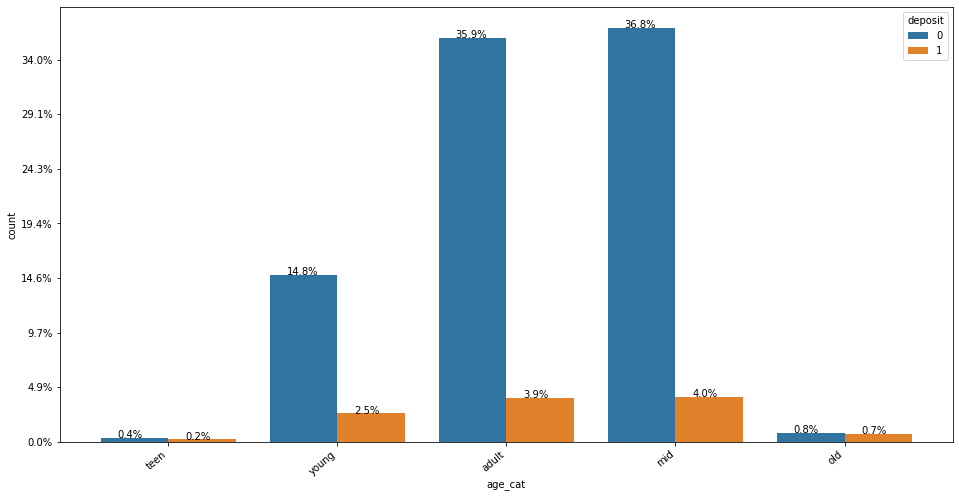

In [15]:
countplot_with_Y_type('age_cat', data, hue = 'deposit')

In [16]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [17]:
# Let's try binning employed
job_mapping = {'management': 'white_collar', 'admin': 'white_collar', 'services': 'pink_collar', 'housemaid':'pink_collar', 
               'retired': 'other', 'student': 'other', 'unemployed': 'other', 'unknown': 'other'}
data['job_mapped'] = data['job'].replace(job_mapping)
data['job_mapped'] = data['job_mapped'].astype('category')

<ipython-input-12-c148809cf8f6>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


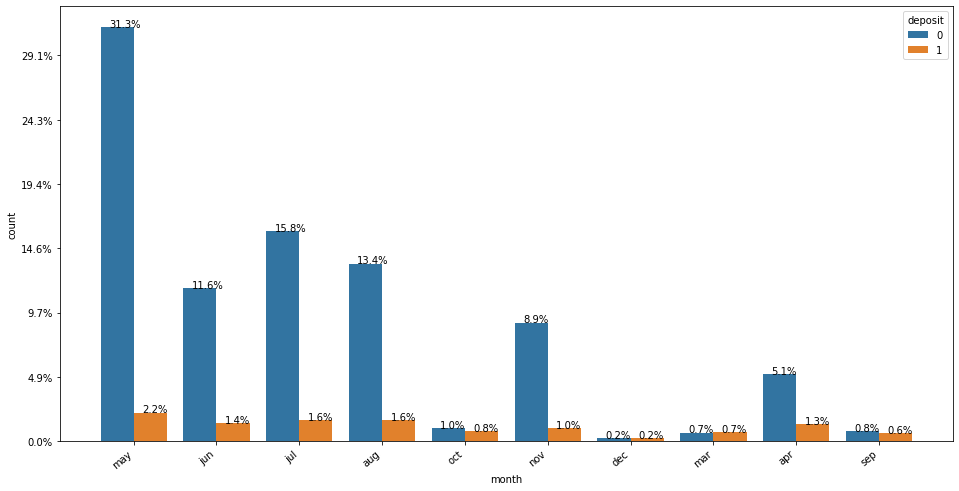

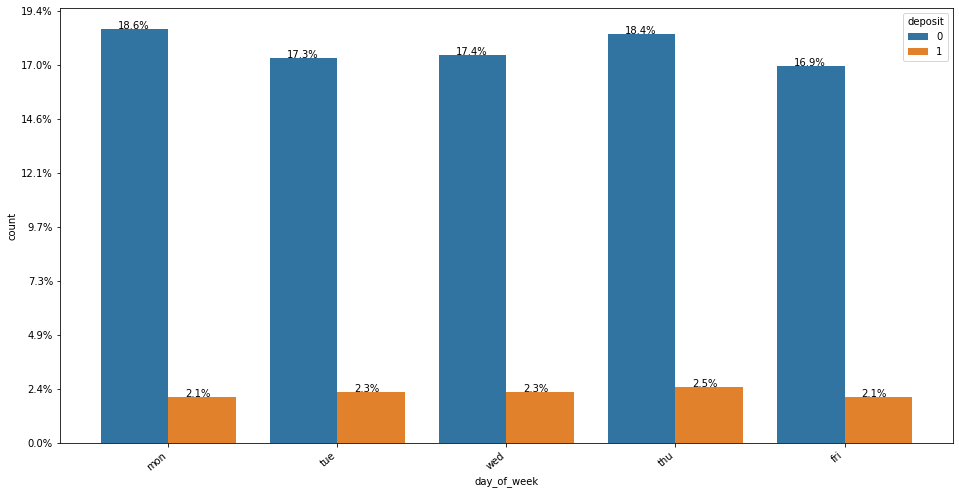

In [18]:
countplot_with_Y_type('month', data, hue = 'deposit')
countplot_with_Y_type('day_of_week', data, hue = 'deposit') # useless feature, drop it

/Users/abhil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/abhil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/abhil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


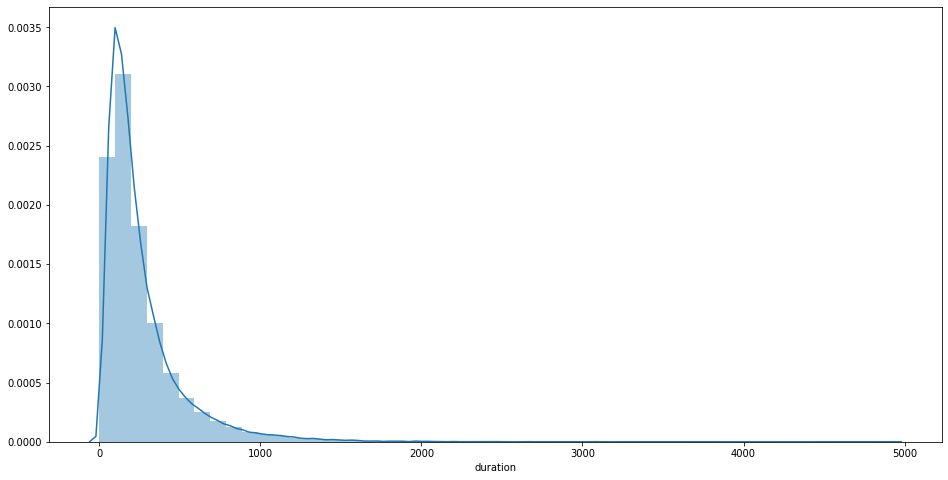

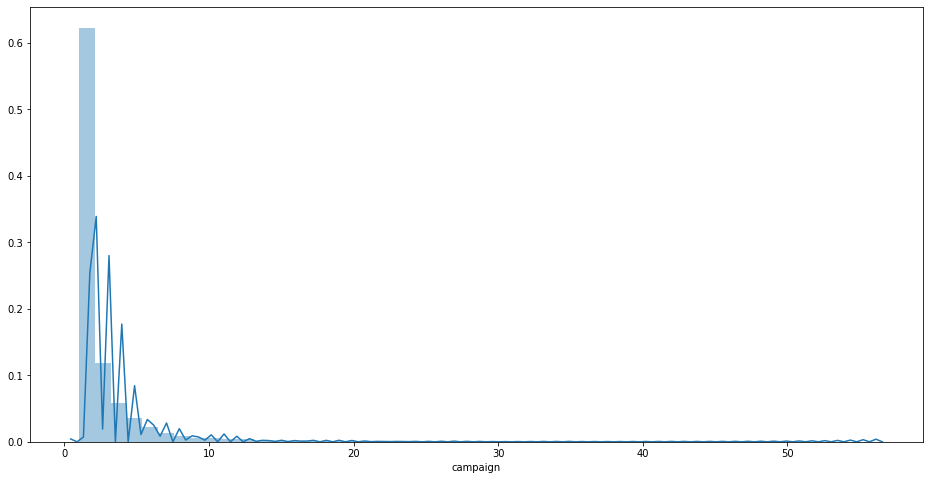

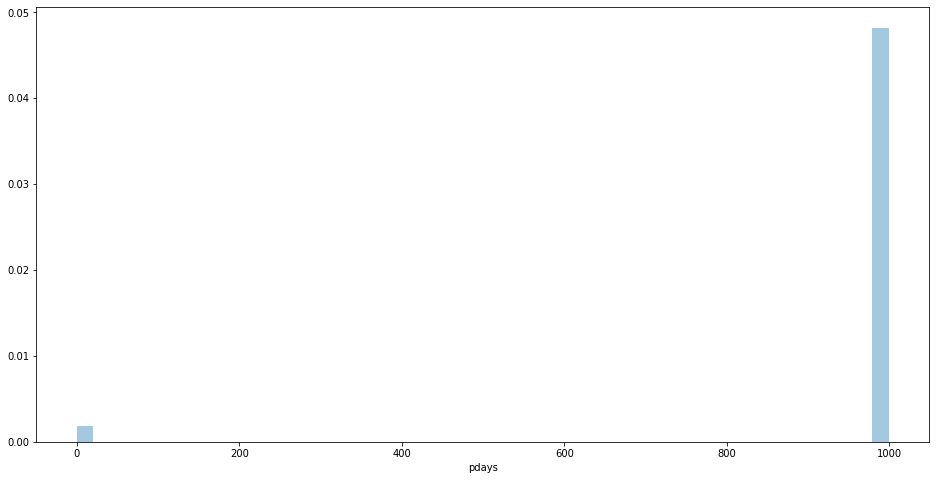

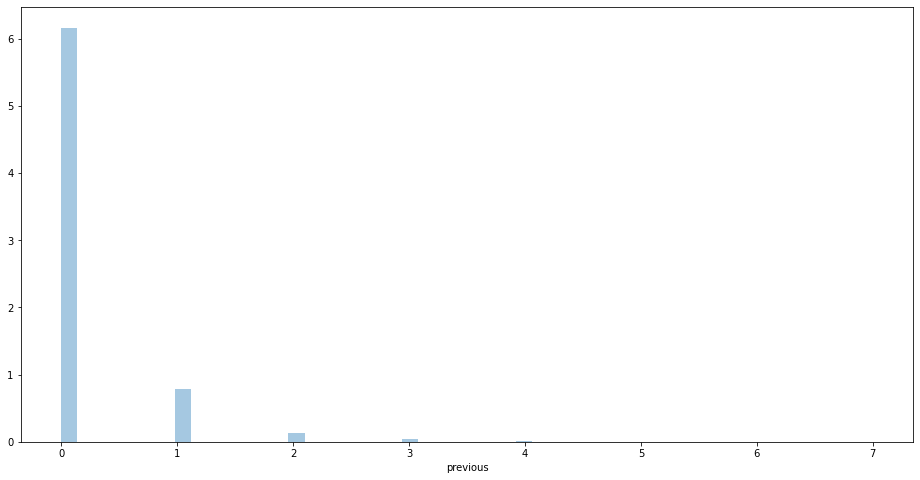

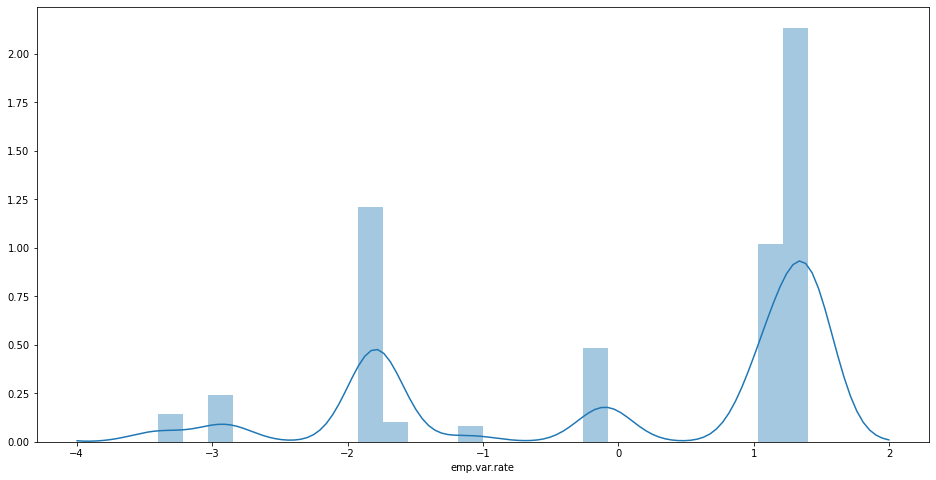

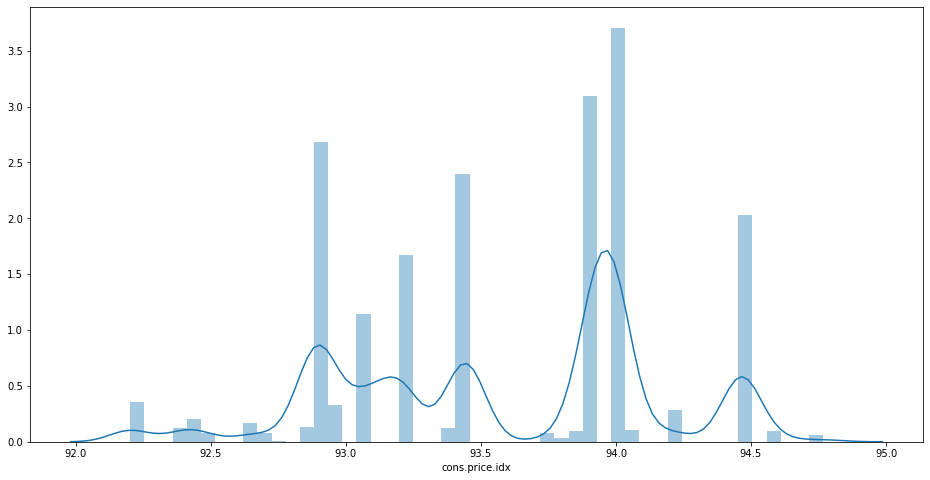

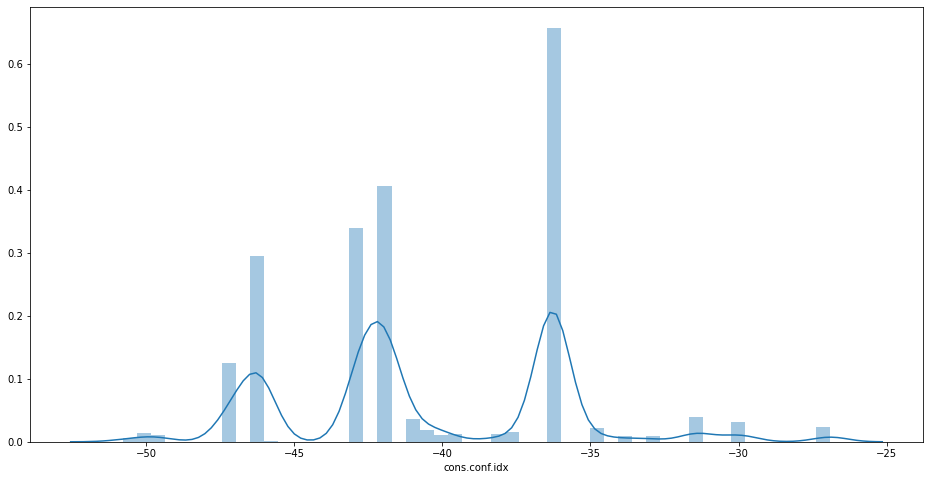

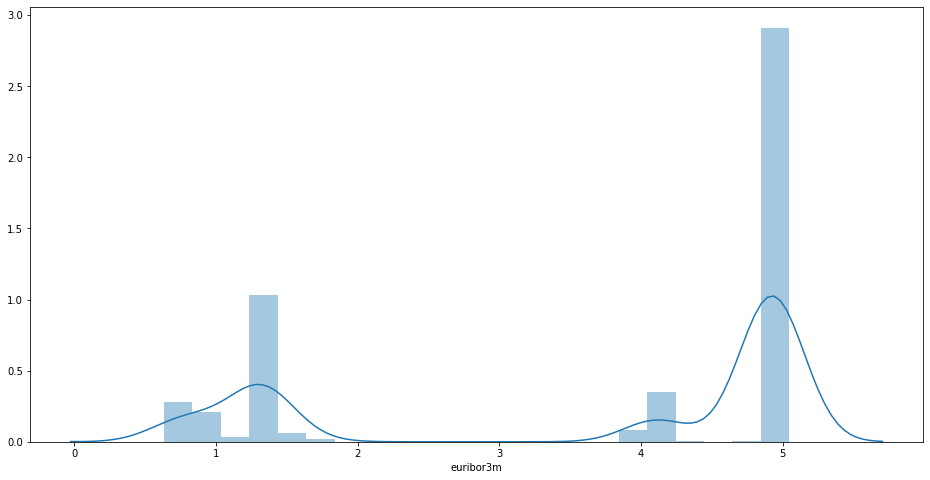

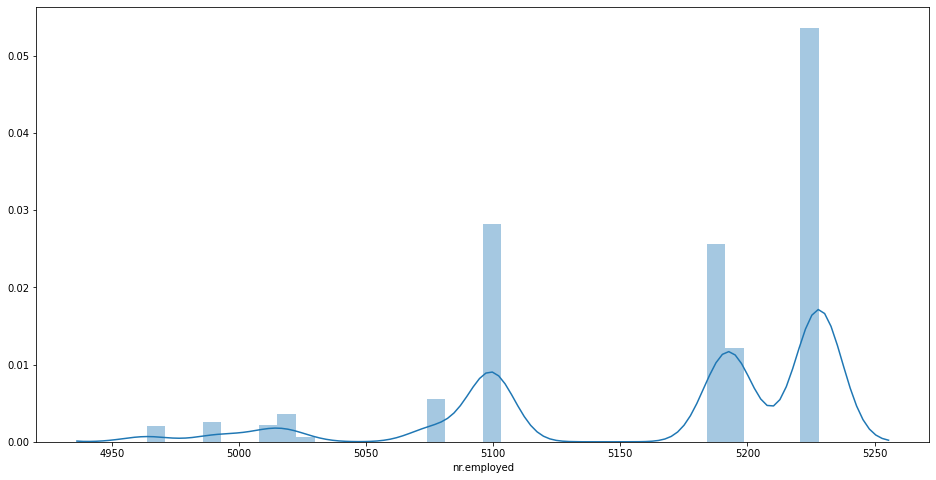

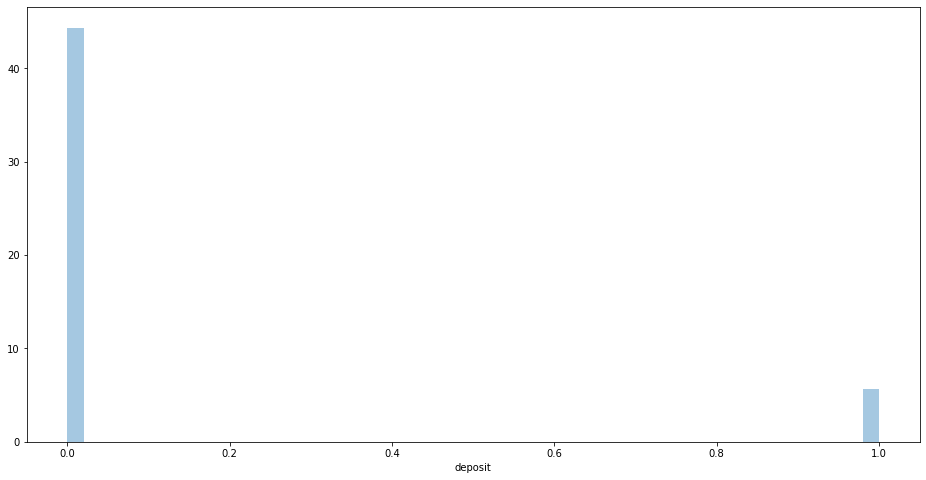

In [19]:
for col in nums:
    countplot_with_Y_type(col, data, dtype = 'num', hue = 'deposit')

### Few Observations
    Duration: Call durations are expected to follow the skewed distribution we see above. A log scale might correct it and make it more relatable
    Campaign: Follows exponential distribution and will try the transformation to see if it helps
    pdays: This could be converted to categorical by making categories like ['week', '2 weeks', 'month', 'never'] and tets if it has better relation with the target variable
    previous: Follows exponential distribution as well
    Rest of the variables are multi modal distributions and will not change anything for them. Need to check for correlations for them

Text(0, 0.5, 'Count')

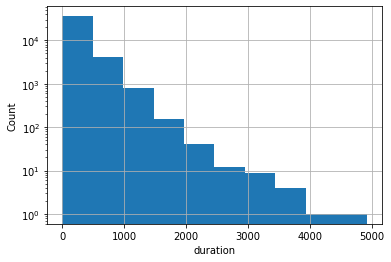

In [20]:
#Plotting a histogram - log scale for duration variable
fig, ax =plt.subplots()
data['duration'].hist(ax=ax, bins=10) #State how many bins you want
ax.set_yscale('log') #Rescaling to log, since large numbers can mess up the weightings for some models
ax.tick_params(labelsize=10)
ax.set_xlabel('duration')
ax.set_ylabel('Count') #How many times the specific numbers of ratings count happened

Text(0, 0.5, 'Count')

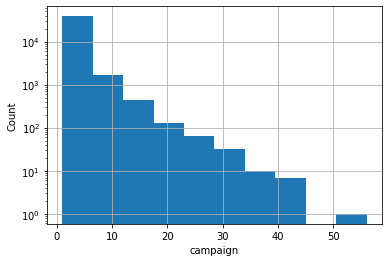

In [21]:
fig, ax =plt.subplots()
data['campaign'].hist(ax=ax, bins=10) #State how many bins you want
ax.set_yscale('log') #Rescaling to log, since large numbers can mess up the weightings for some models
ax.tick_params(labelsize=10)
ax.set_xlabel('campaign')
ax.set_ylabel('Count') #How many times the specific numbers of ratings count happened

In [29]:
data['pdays_cat'] = pd.cut(data['pdays'], bins = [-1, 8, 30, 10000], labels = ['week', 'month', 'never'])

In [30]:
nums.remove('pdays')
cats.append('pdays_cat')

This is more linearly seperable for decision trees and random forests than the previous distribution. 

<ipython-input-12-c148809cf8f6>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


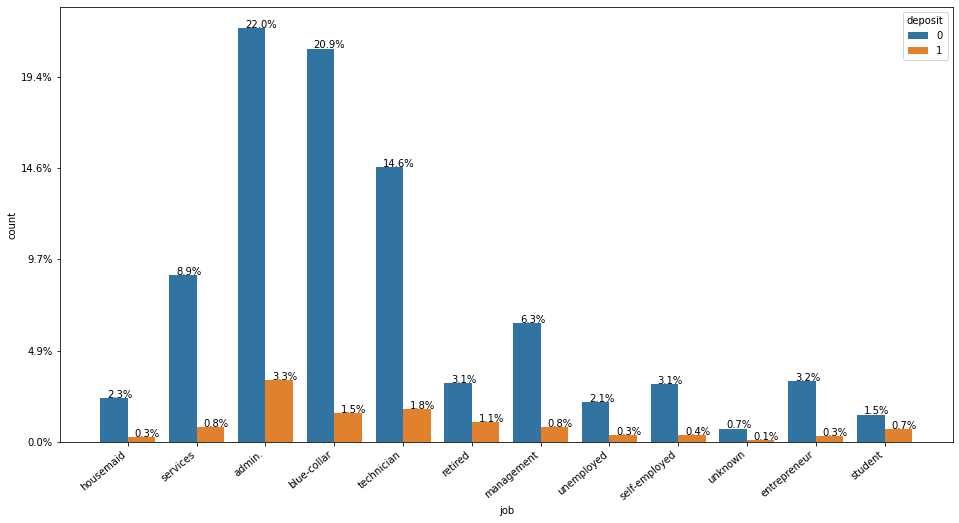

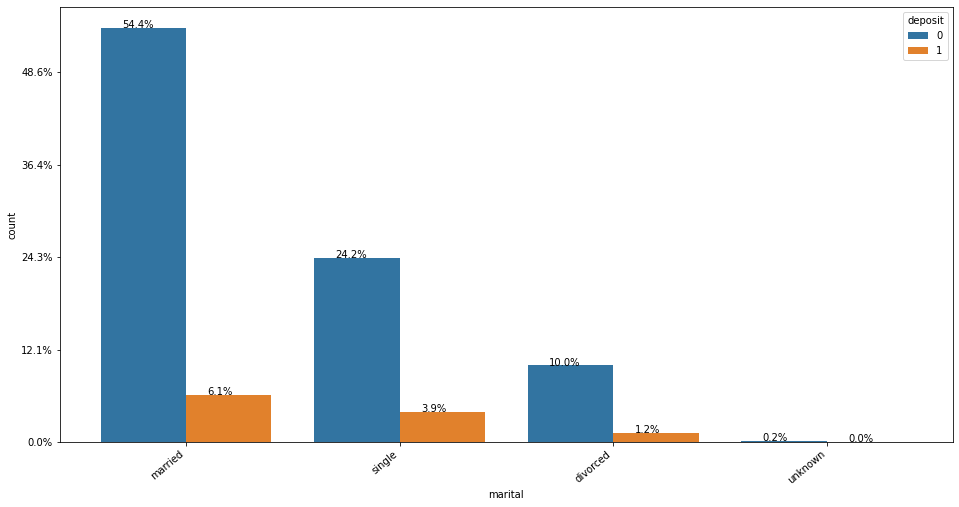

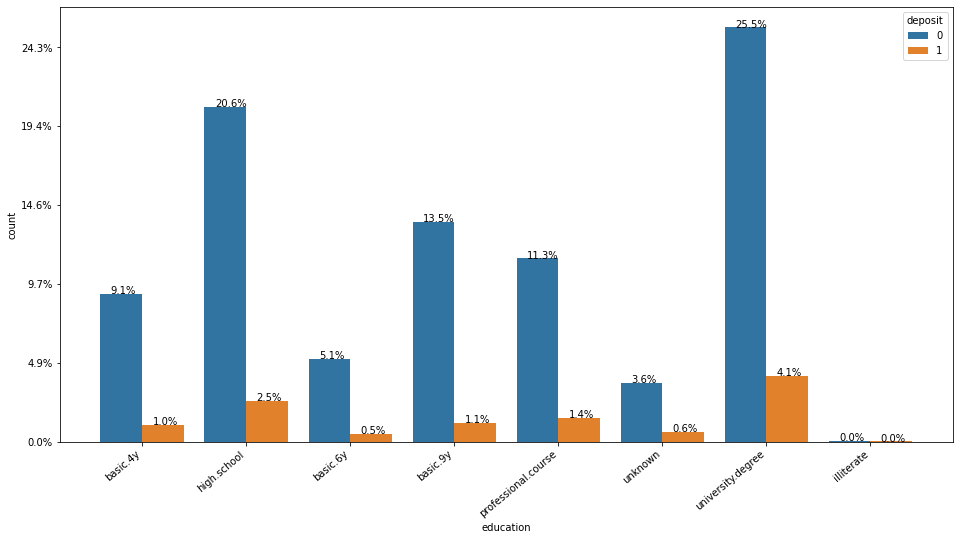

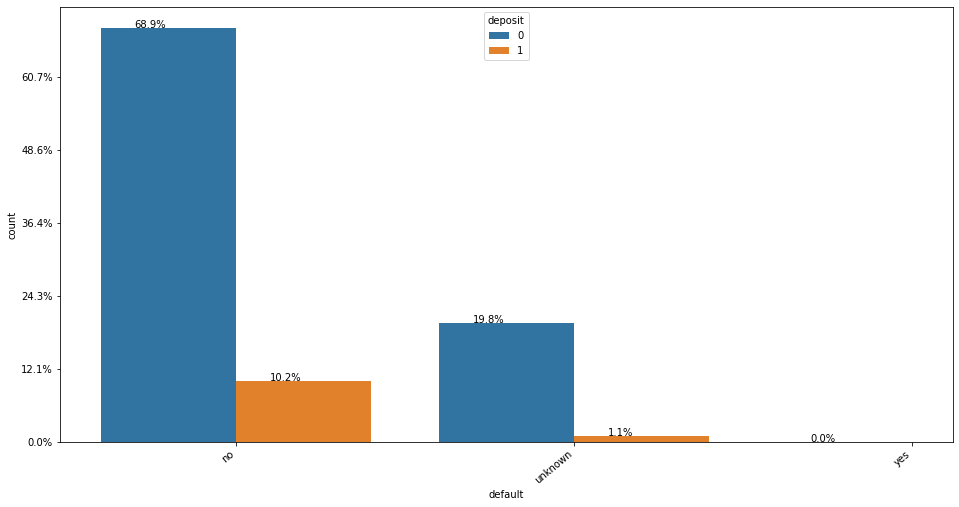

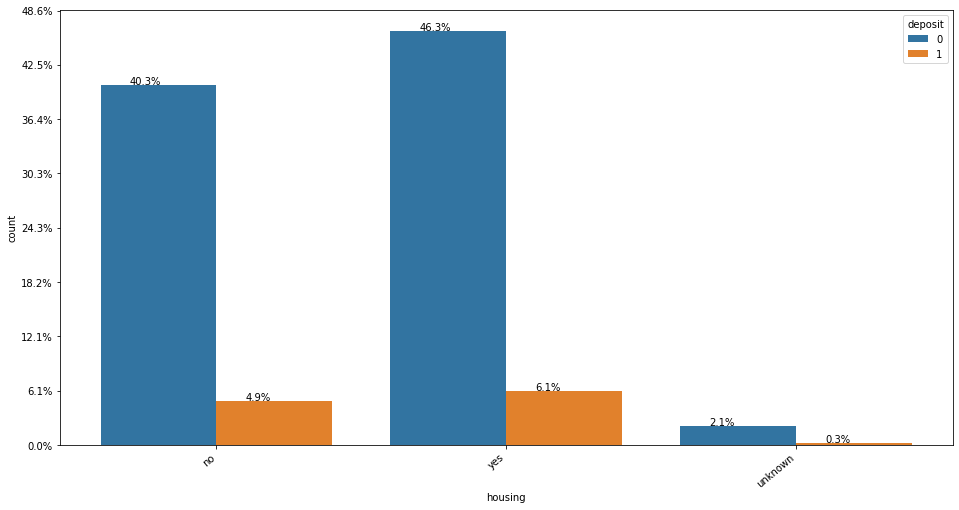

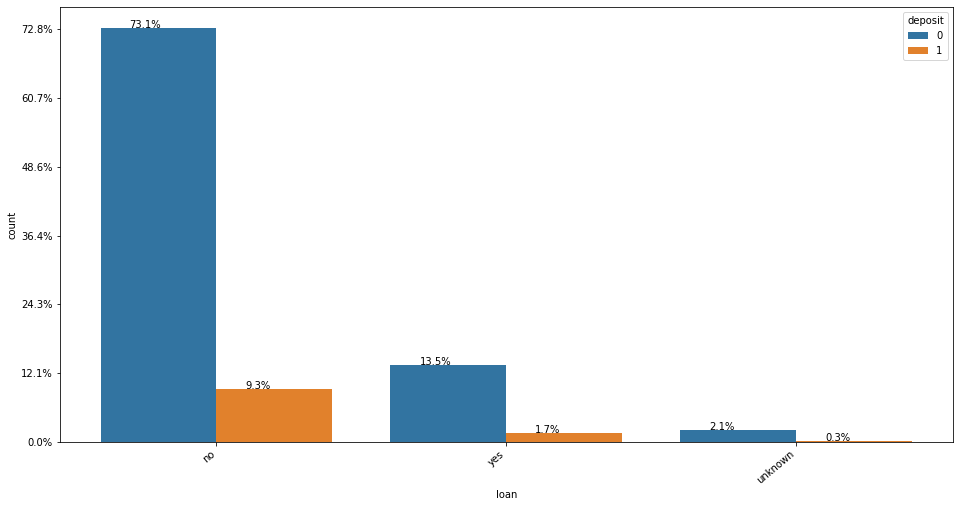

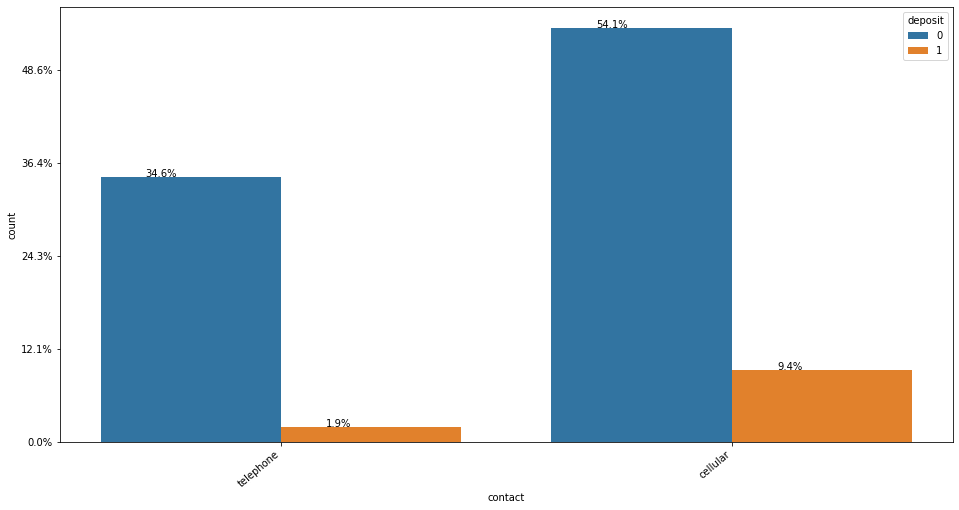

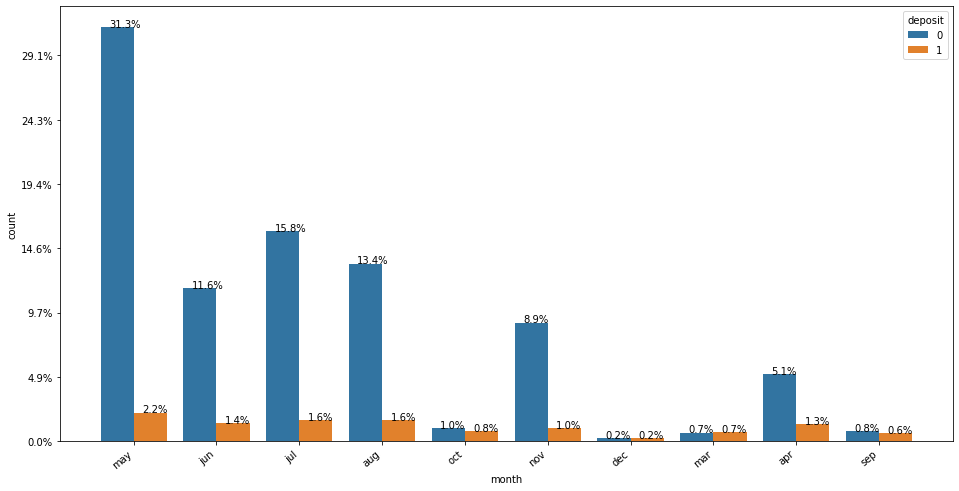

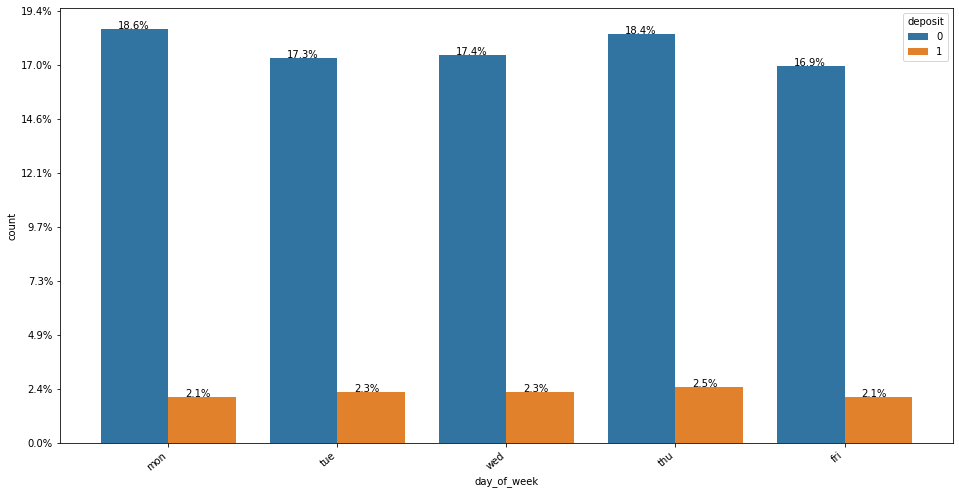

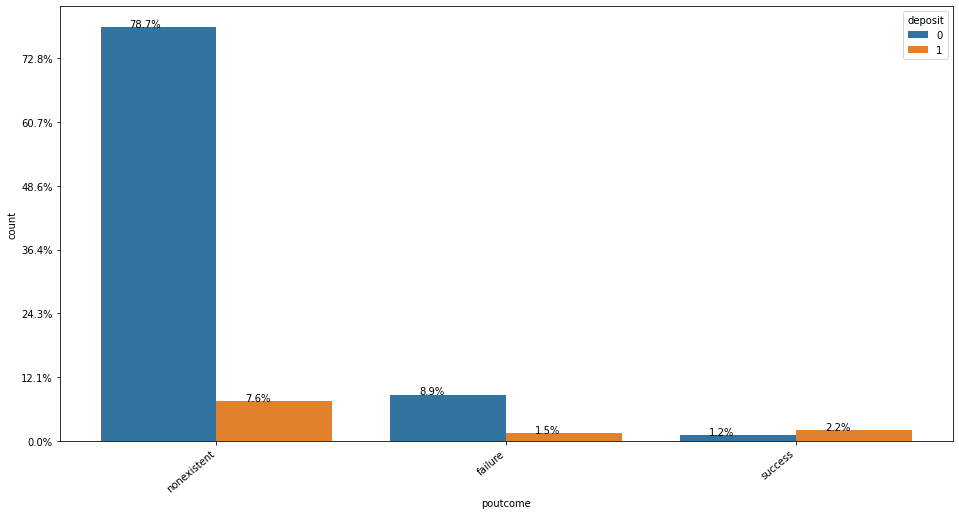

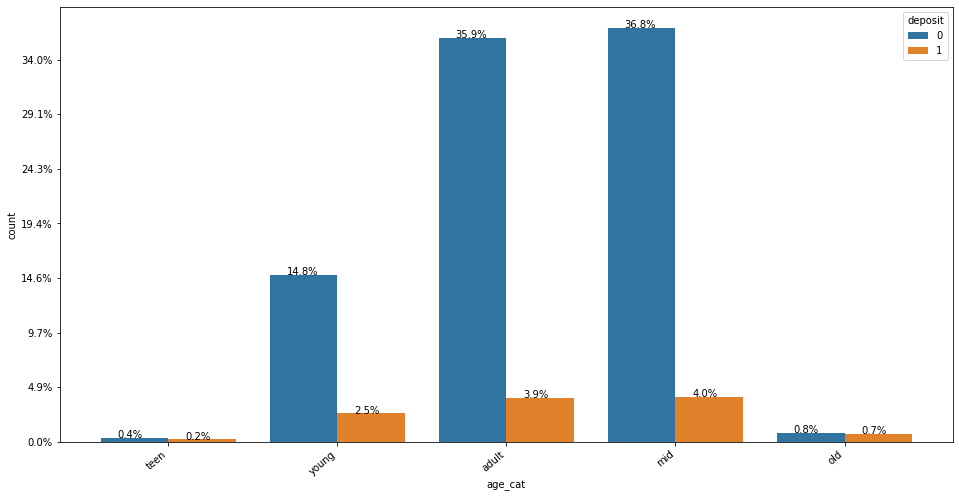

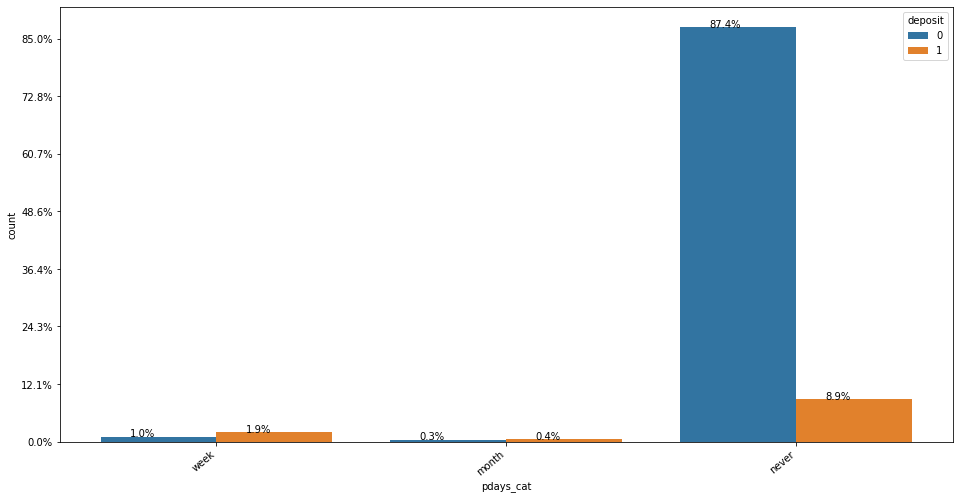

In [31]:
for col in cats:
    countplot_with_Y_type(col, data, hue = 'deposit')

In [32]:
percent_of_category_deposits_dict = {}
for col in cats:
    for d in data[[col, 'deposit']].groupby(col):
        try:
            percent_of_category_deposits_dict[str(col + '_' + d[0])] = d[1]['deposit'].value_counts()[1]/d[1]['deposit'].value_counts()[0]
        except:
            pass


In [33]:
percent_of_category_deposits_dict_sorted= {k: v for k, v in sorted(percent_of_category_deposits_dict.items(),reverse=True, key=lambda item: item[1])}

In [34]:
percent_of_category_deposits_dict

{'job_admin.': 0.14906284454244764,
 'job_blue-collar': 0.07404828226555246,
 'job_entrepreneur': 0.09309309309309309,
 'job_housemaid': 0.1111111111111111,
 'job_management': 0.1263482280431433,
 'job_retired': 0.33748055987558323,
 'job_self-employed': 0.11713836477987422,
 'job_services': 0.08859023587493144,
 'job_student': 0.4583333333333333,
 'job_technician': 0.12140362547813072,
 'job_unemployed': 0.16551724137931034,
 'job_unknown': 0.12627986348122866,
 'marital_divorced': 0.11508704061895551,
 'marital_married': 0.11305590283979282,
 'marital_single': 0.16284680337756333,
 'marital_unknown': 0.17647058823529413,
 'education_basic.4y': 0.11419423692636073,
 'education_basic.6y': 0.08935361216730038,
 'education_basic.9y': 0.08488872936109117,
 'education_high.school': 0.12152286657237152,
 'education_illiterate': 0.2857142857142857,
 'education_professional.course': 0.1280120481927711,
 'education_university.degree': 0.15907791960373405,
 'education_unknown': 0.16959459459459

### Observations from above:
    poutcome: We have more successes when marketed to people who accepted last campaign. So, we can market to them first as a priority
    
    Month: More successes come when marketed in March, December, September, October. So campaigns should focus on these months more. There are really less numbers for these months but that didn't stop April from getting 1.3% of total people to accept the campaign. A reason should be found on why campaigns are less during these months.
    
    Age: People who are really young or old tend to be ideal customers
    
    job: Students, retired and illiterates tend to say yes to the campaign more often


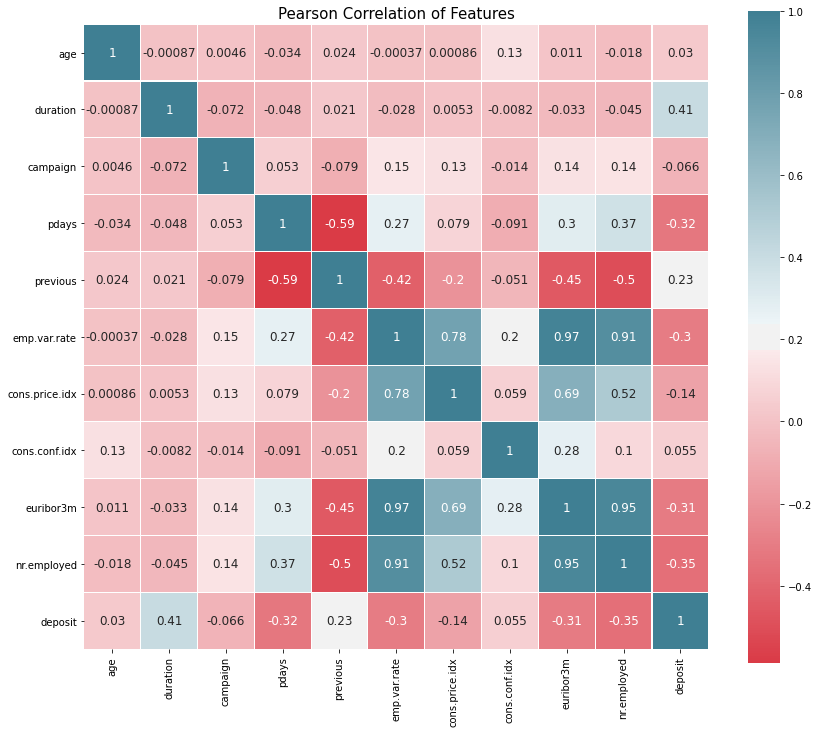

In [35]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(data.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

Drop the euribor3m and emp.var.rate variable

In [36]:
data = data.drop(['euribor3m', 'day_of_week','emp.var.rate'], axis = 1)

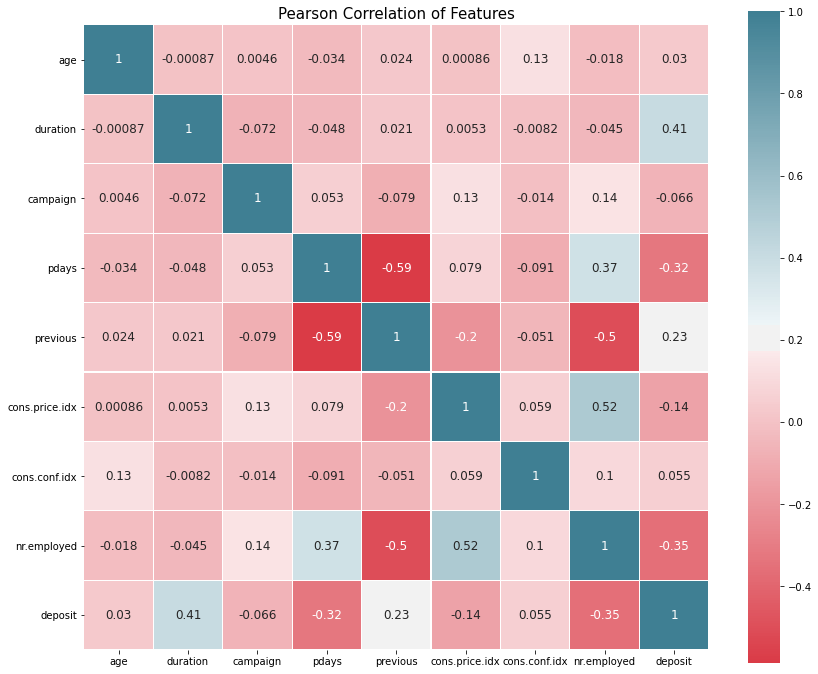

In [37]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(data.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [49]:
data

,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,deposit,age_cat,job_mapped,pdays_cat
0,housemaid,married,basic.4y,no,no,no,telephone,may,0.389913,-1.045497,0,nonexistent,93.994,-36.4,5191.0,0,mid,pink_collar,never
1,services,married,high.school,unknown,no,no,telephone,may,-0.234770,-1.045497,0,nonexistent,93.994,-36.4,5191.0,0,mid,pink_collar,never
2,services,married,high.school,no,yes,no,telephone,may,0.225113,-1.045497,0,nonexistent,93.994,-36.4,5191.0,0,adult,pink_collar,never
3,admin.,married,basic.6y,no,no,no,telephone,may,-0.220434,-1.045497,0,nonexistent,93.994,-36.4,5191.0,0,adult,admin.,never
4,services,married,high.school,no,no,yes,telephone,may,0.579397,-1.045497,0,nonexistent,93.994,-36.4,5191.0,0,mid,pink_collar,never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,0.679357,-1.045497,0,nonexistent,94.767,-50.8,4963.6,1,old,other,never
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,0.844003,-1.045497,0,nonexistent,94.767,-50.8,4963.6,0,mid,blue-collar,never
41185,retired,married,university.degree,no,yes,no,cellular,nov,0.024694,0.245075,0,nonexistent,94.767,-50.8,4963.6,0,mid,other,never
41186,technician,married,professional.course,no,no,no,cellular,nov,1.019426,-1.045497,0,nonexistent,94.767,-50.8,4963.6,1,mid,technician,never


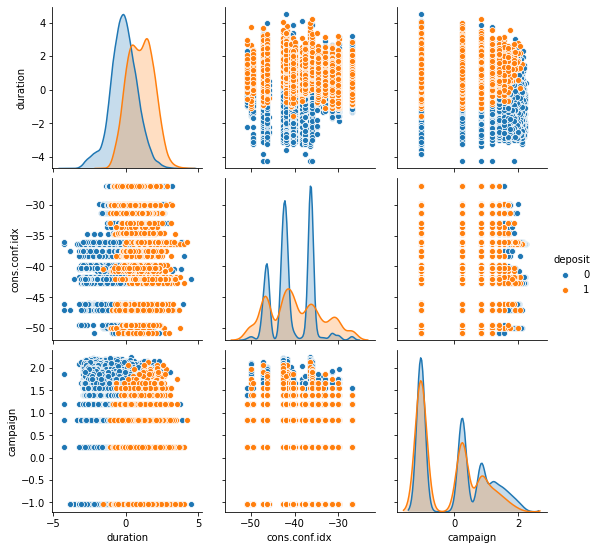

In [58]:
sns.pairplot(data[['duration', 'cons.conf.idx', 'campaign', 'deposit']], hue='deposit')

For most of the variables our pair plot is overlapping a lot.

Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes
If you contacte dteh custoemr in last week, and try again this week you have a high chance of subscribing to term deposit


In [39]:
data = data.drop(['age', 'pdays'], axis = 1)

Let's do final few transformations to the data

In [40]:
from sklearn.preprocessing import power_transform

In [41]:
data['duration'] = power_transform(data['duration'].values.reshape(-1,1))

In [42]:
data['campaign'] = power_transform(data['campaign'].values.reshape(-1,1))

In [43]:
data.to_csv('data_after_eda.csv', index = False)